<a href="https://colab.research.google.com/github/Katonokatono/Suicide/blob/Preprocessing/Suicide_Detection_Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from spacy.lang.en import English
nlp = English()
import spacy
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/Anxiety.csv')
df2=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/Drugs_label.csv')
df3=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/Stress (1).csv')
df4=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/addiction_label.csv')
df5=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/anxiety-1.csv')
df6=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/anxious.csv')
df7=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/givingup.csv')
df8=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/sub-abuse.csv')
df9=pd.read_csv('/content/drive/MyDrive/SD_ Project /Alphacoders_ labelled_data/suicidal_file.csv')
df10=pd.read_csv('/depression_all -revised.csv')

In [ ]:
df1.dropna(inplace=True)
df1.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
1,1,1,BunMo Multi Item Stretchy Strings Fidget Toy 6...,Burundi,Официальная учетная запись Twitter для Journal...,182,83,6950,09/14/2021 7:47,0,[],anxiety
2,2,2,@unkonfined The basic motivation behind our be...,Kenya,...dark nights of the soul are real and of gre...,983,915,12944,09/14/2021 7:31,0,[],anxiety
3,3,3,@Munenekimathi5 @zablonorina1 Is your BP norma...,"Nairobi, Kenya",Enterpreneur and start up Advisor\nBeliever in...,281,63,290,09/14/2021 7:30,0,[],anxiety
4,4,4,How do you deal with being anxious?\n\nShare y...,Nairobi Kenya,Your Ultimate Fresh and Classic Hits\n\n96.9 F...,220,2052,37982,09/14/2021 7:02,0,[],anxiety
5,5,5,"Did you know ‘dry spell’ causes anxiety, depre...","Nairobi, Kenya",Chelsea fan,857,272,650,09/14/2021 7:00,2,[],general tweet


In [ ]:
df2.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,bigboydarboe,@FatoumattaMbye Might just be a mixture of bot...,"Kilimanjaro, Tanzania",Citizen of Borderline,1080,957,1457,09/18/2021 5:13,0,[],general tweet
1,1,CrimeSiPoaKenya,As cases of drug peddling and consumption incr...,"Sarakasi Dome,Ngara_Nairobi KE",We are an impact-driven organization resolved ...,1014,1087,1971,09/18/2021 4:57,0,[],general tweet
2,2,anyonaamsowel,Parenting Teens conversation on #themorningaft...,"Nakuru, Kenya",CEO and director Amsowel counseling firm in Na...,2909,3333,509,09/18/2021 4:40,2,"[{'text': 'themorningafter', 'indices': [32, 4...",general tweet
3,3,dklaston,He looks like he was giving her drugs all day ...,"Nairobi, Kenya",Lawyer,3749,3805,33929,09/18/2021 4:27,0,[],general tweet
4,4,webrwanda,The Rwanda Investigation Bureau is urging the ...,Rwanda,All News Content about Rwanda in Real Time,92,219,63602,09/18/2021 3:38,1,"[{'text': 'RwOT', 'indices': [80, 85]}, {'text...",general tweet


In [ ]:
df3.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0,NjorogeDorcas3,Our lovely friends from lake side please share...,Nairobi Kenya,Big addict of classic 105 morning show #MainaA...,497,3368,39784,2021-09-17 05:33:46,1,[],stress,NaN,NaN,NaN,NaN,NaN,NaN
1,1,gkukubo,@Classic105Kenya @ItsMainaKageni @ItsMainaKage...,"Nairobi, Kenya",Work hard pray hard be smart,2110,170,120,2021-09-17 05:33:32,0,"[{'text': 'MainaAndKingangi', 'indices': [66, ...",general,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sharon_ondisa3,Maina wewe pia hii #MainaAndKingangi playlist ...,"Nairobi, Kenya","Community Practitioner, Well-informed, Optimis...",149,286,2648,2021-09-17 05:27:04,0,"[{'text': 'MainaAndKingangi', 'indices': [19, ...",general,NaN,NaN,NaN,NaN,NaN,NaN
3,3,walterodhis1,@Classic105Kenya @ItsMainaKageni I think the k...,"Nairobi, Kenya",A philosopher who philosophy philosophies to o...,82,364,2875,2021-09-17 05:22:47,0,[],general,NaN,NaN,NaN,NaN,NaN,NaN
4,4,maureennzau,Luos your stress freeee ooooooh \n@FelixAgola\...,"Nairobi, Kenya",Self love ......I don't listen what people tal...,381,1130,5762,2021-09-17 05:18:31,0,"[{'text': 'MainaAndKingangi', 'indices': [55, ...",general,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop unnecessary columns
df3.drop(['Unnamed: 12', 'Unnamed: 13','Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],axis = 1, inplace = True)

In [ ]:
df3.shape

(450, 12)

In [ ]:
df8.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,0,CliffOnyango6,@KituNiFreshiii @kilundeezy They say it every...,"Nairobi, Kenya",Introverted Son🤓 | Chemist⚗️|Environmental Act...,562,287,1578,16/09/2021 18:11,0,[],substance abuse
1,1,1,DanielMaithyaKE,Michael: DRUG ABUSE and MENTAL ILLNESS are amo...,"Nairobi, Kenya",Just Google my name: Daniel Maithya\n\n| 📲 +2...,136851,188269,219347,16/09/2021 13:31,9,[],substance abuse
2,2,2,democracy_trust,I am the current KANU Women Congress National ...,"Nairobi, Kenya",The Democracy Trust Fund's vision is to identi...,167,96,224,16/09/2021 11:51,0,[],Awareness
3,3,3,Dok_Tari254,"Men,\n\nIf you ain't performing well in bed, \...","Nairobi, Kenya",Art Enthusiast | Video Reviewer | Researcher |...,28,46,180,16/09/2021 07:45,1,[],general tweet
4,4,4,ItsChanzu,Want to see what happens to CBC kids when they...,Nairobi,OVO 🦉 (Ongatarongai's Very Own)) 🇰🇪,1677,13173,63279,16/09/2021 06:30,8,[],general tweet


In [ ]:
#drop unnecessary columns
df8.drop(['Unnamed: 0.1' ],axis = 1, inplace = True)
df8.shape

(62, 12)

In [ ]:
df9.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,0,News_Kenya,[COUNTIES] Suicide rates in Central Kenya worr...,Nairobi,Kenyan News Updates: Get Breaking News on Twit...,43,24673,174373,9/15/2021 11:39,0,[],general tweet
1,1,1,MZaikah,"@DonaldBKipkorir Hustler has allusion From\n"" ...","Nairobi, Kenya","Professional Advisor, Experienced life Winner,...",74,15,516,9/15/2021 11:35,0,[],general tweet
2,2,2,Aleckeei,I always see people say &amp; tweet be kind to...,"Nairobi, Kenya",|Free Thinker | Pragmatist| Anti-Capitalism| E...,2537,1665,42896,9/15/2021 11:32,0,[],thoughts
3,3,3,ngatia27,@SylviaKasanga We need to decriminalizate atte...,nairobi,"It's easier to tax income, than wealth",969,316,5031,9/15/2021 10:07,0,"[{'text': 'mentalhealth', 'indices': [61, 74]}]",general tweet
4,4,4,SylviaKasanga,At the Kenya Psychiatric Association13th Annua...,"Nairobi, Kenya","MCIArb, Arch(1083) MAAK, MBA Practicing Arch.a...",723,4970,1732,9/15/2021 10:03,1,[],general tweet


In [ ]:
#drop unnecessary columns
df9.drop(['Unnamed: 0.1' ],axis = 1, inplace = True)
df9.shape

(809, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1 to 513
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       492 non-null    int64 
 1   user             492 non-null    int64 
 2   tweet            492 non-null    object
 3   location         492 non-null    object
 4   description      492 non-null    object
 5   friends_count    492 non-null    int64 
 6   followers_count  492 non-null    int64 
 7   statuses_count   492 non-null    int64 
 8   created_at       492 non-null    object
 9   retweet_count    492 non-null    int64 
 10  hashtags         492 non-null    object
 11  label            492 non-null    object
dtypes: int64(6), object(6)
memory usage: 50.0+ KB


In [ ]:
df1.shape

(492, 12)

In [ ]:
df2.shape

(619, 12)

In [ ]:
df3.shape

(450, 12)

In [ ]:
df4.shape

(274, 12)

In [ ]:
df5.shape

(524, 12)

In [ ]:
df6.shape

(151, 12)

In [ ]:
df7.shape

(196, 12)

In [ ]:
df8.shape

(62, 12)

In [ ]:
df9.shape

(809, 12)

In [ ]:
df10.shape

(685, 12)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       619 non-null    int64 
 1   user             619 non-null    object
 2   tweet            619 non-null    object
 3   location         615 non-null    object
 4   description      592 non-null    object
 5   friends_count    619 non-null    int64 
 6   followers_count  619 non-null    int64 
 7   statuses_count   619 non-null    int64 
 8   created_at       619 non-null    object
 9   retweet_count    619 non-null    int64 
 10  hashtags         619 non-null    object
 11  label            613 non-null    object
dtypes: int64(5), object(7)
memory usage: 58.2+ KB


In [ ]:
data=pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [ ]:
data.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
1,1,1,BunMo Multi Item Stretchy Strings Fidget Toy 6...,Burundi,Официальная учетная запись Twitter для Journal...,182,83,6950,09/14/2021 7:47,0,[],anxiety
2,2,2,@unkonfined The basic motivation behind our be...,Kenya,...dark nights of the soul are real and of gre...,983,915,12944,09/14/2021 7:31,0,[],anxiety
3,3,3,@Munenekimathi5 @zablonorina1 Is your BP norma...,"Nairobi, Kenya",Enterpreneur and start up Advisor\nBeliever in...,281,63,290,09/14/2021 7:30,0,[],anxiety
4,4,4,How do you deal with being anxious?\n\nShare y...,Nairobi Kenya,Your Ultimate Fresh and Classic Hits\n\n96.9 F...,220,2052,37982,09/14/2021 7:02,0,[],anxiety
5,5,5,"Did you know ‘dry spell’ causes anxiety, depre...","Nairobi, Kenya",Chelsea fan,857,272,650,09/14/2021 7:00,2,[],general tweet


In [ ]:

data.shape

(4262, 12)

In [ ]:
#drop unnecessary columns
data.drop(['Unnamed: 0', 'user','description','hashtags'],axis = 1, inplace = True)

In [ ]:
# Check for nulls
data.isnull().sum()

tweet               0
location           33
friends_count       0
followers_count     0
statuses_count      0
created_at          0
retweet_count       0
label               7
dtype: int64

In [ ]:
# Select rows where columns has NaN value
selected_rows = data[data['label'].isnull()]
print('Selected rows')
selected_rows

Selected rows


,tweet,location,friends_count,followers_count,statuses_count,created_at,retweet_count,label
173,@Just_Wanjiru Ilikuwa drugs Bbz,Kenya,1265,4387,308823,09/15/2021 18:47,0,NaN
202,Anaesthesia is chill. Give your drugs and sit ...,"Kampala, Uganda",2058,2287,15586,09/15/2021 10:50,0,NaN
318,During the lockdown access to Medicare and dru...,Kampala Uganda,334,114,2343,09/13/2021 16:48,0,NaN
509,Sobi arthritis drug cuts death risk; heart dru...,"Kigali, Rwanda",840,703,71024,09-11-21 3:46,0,NaN
533,Real atheists should be having orgies and doin...,"Nairobi, Kenya",2301,1955,25063,09-10-21 14:51,0,NaN
543,@Shifframarvins1 free alcohol and drugs.... 😳🤦‍♂️,"Kampala, Uganda",780,325,1715,09-10-21 12:30,0,NaN
478,There are many cases of death by #suicide For ...,Kenya,693,687,957,9/10/2021 7:03,13,NaN


In [ ]:
# drop null
data.dropna(inplace=True)

In [ ]:
# Check for duplicates
data.duplicated().value_counts()

False    4172
True       50
dtype: int64

In [ ]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4172 entries, 1 to 684
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet            4172 non-null   object
 1   location         4172 non-null   object
 2   friends_count    4172 non-null   object
 3   followers_count  4172 non-null   int64 
 4   statuses_count   4172 non-null   int64 
 5   created_at       4172 non-null   object
 6   retweet_count    4172 non-null   object
 7   label            4172 non-null   object
dtypes: int64(2), object(6)
memory usage: 293.3+ KB


In [ ]:
# Check unique values of label column
data['label'].unique()

array(['anxiety', 'general tweet', 'awareness', 'depression',
       'substance abuse', 'thoughts', 'stress', 'general',
       'suicidal thoughts ', 'Awareness', 'suicidal thoughts',
       'general tweets'], dtype=object)

In [ ]:
# CHange label column to lowercase and edit classnames
data['label'] = data['label'].str.lower()

data['label'] = data['label'].replace(['general'],'general tweet')
data['label'] = data['label'].replace(['suicidal thoughts'],'thoughts')
data['label'] = data['label'].replace(['general tweets'],'general tweet')
data['label'] = data['label'].replace(['anxiety '],'anxiety')
data['label'] = data['label'].replace(['suicidal thoughts '],'thoughts')

In [ ]:
# Check unique values of label column
data['label'].unique()

array(['anxiety', 'general tweet', 'awareness', 'depression',
       'substance abuse', 'thoughts', 'stress'], dtype=object)

In [ ]:
# new data frame with split value columns
data_1 = data["location"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
data["town"]= data_1[0]
  
# making separate last name column from new data frame
data["country"]= data_1[1]
  


In [ ]:
data[:3]

,tweet,location,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,country
1,BunMo Multi Item Stretchy Strings Fidget Toy 6...,Burundi,182,83,6950,09/14/2021 7:47,0,anxiety,Burundi,None
2,@unkonfined The basic motivation behind our be...,Kenya,983,915,12944,09/14/2021 7:31,0,anxiety,Kenya,None
3,@Munenekimathi5 @zablonorina1 Is your BP norma...,"Nairobi, Kenya",281,63,290,09/14/2021 7:30,0,anxiety,Nairobi,Kenya


In [ ]:
# Change to lowercase
data['town'] = data['town'].str.lower()
data['country'] = data['country'].str.lower()


In [ ]:
data

,tweet,location,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,country
1,BunMo Multi Item Stretchy Strings Fidget Toy 6...,Burundi,182,83,6950,09/14/2021 7:47,0,anxiety,burundi,None
2,@unkonfined The basic motivation behind our be...,Kenya,983,915,12944,09/14/2021 7:31,0,anxiety,kenya,None
3,@Munenekimathi5 @zablonorina1 Is your BP norma...,"Nairobi, Kenya",281,63,290,09/14/2021 7:30,0,anxiety,nairobi,kenya
4,How do you deal with being anxious?\n\nShare y...,Nairobi Kenya,220,2052,37982,09/14/2021 7:02,0,anxiety,nairobi kenya,None
5,"Did you know ‘dry spell’ causes anxiety, depre...","Nairobi, Kenya",857,272,650,09/14/2021 7:00,2,general tweet,nairobi,kenya
...,...,...,...,...,...,...,...,...,...,...
680,@MillicentOmanga I have decided to put my ego ...,Bungoma,726,117,375,07-09-21 8:04,0,depression,bungoma,None
681,@amerix I have decided to put my ego aside and...,Bungoma,726,117,375,07-09-21 8:01,0,depression,bungoma,None
682,Some of the longterm drug effects include; dep...,"Isiolo, Kenya",746,756,560,07-09-21 7:04,11,awareness,isiolo,kenya
683,@itsminabo_ @lenana_samorai @bennytothedj Hio ...,"Kiambu, Kenya",796,228,3694,07-09-21 6:33,1,general tweet,kiambu,kenya


In [ ]:
#data['date'] = pd.to_datetime(data['created_at'],format="%m-%d-%y %H:%M")
#data['hour'] = pd.DatetimeIndex(data['created_at']).hour
#data['minute'] = pd.DatetimeIndex(data['created_at']).minute
#data['month'] = pd.DatetimeIndex(data['created_at']).month
#data['year'] = pd.DatetimeIndex(data['created_at']).year


Tweet Preprocessing

In [ ]:
# Remove url
#removing the URL links
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)
data['tweet']=data['tweet'].apply(lambda x : remove_URL(x))



In [ ]:
data[:10]

,tweet,location,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,country
1,BunMo Multi Item Stretchy Strings Fidget Toy 6...,Burundi,182,83,6950,09/14/2021 7:47,0,anxiety,burundi,None
2,@unkonfined The basic motivation behind our be...,Kenya,983,915,12944,09/14/2021 7:31,0,anxiety,kenya,None
3,@Munenekimathi5 @zablonorina1 Is your BP norma...,"Nairobi, Kenya",281,63,290,09/14/2021 7:30,0,anxiety,nairobi,kenya
4,How do you deal with being anxious?\n\nShare y...,Nairobi Kenya,220,2052,37982,09/14/2021 7:02,0,anxiety,nairobi kenya,None
5,"Did you know ‘dry spell’ causes anxiety, depre...","Nairobi, Kenya",857,272,650,09/14/2021 7:00,2,general tweet,nairobi,kenya
6,As a person who struggles with procrastination...,Kenya,1088,21324,105390,09/14/2021 6:58,5,anxiety,kenya,None
8,OVERCOME ANXIETY\nExercise daily to help you f...,"Nairobi, Kenya",3677,2925,2880,09/14/2021 6:36,0,anxiety,nairobi,kenya
9,OVERCOME ANXIETY \n\nTake a time-out\n\nEat we...,"Nairobi, Kenya",3677,2925,2880,09/14/2021 6:34,0,anxiety,nairobi,kenya
10,Anxiety happens when you think you've to figur...,"Kakamega, Kenya",1943,100,495,09/14/2021 6:34,0,anxiety,kakamega,kenya
11,BunMo Multi Item Stretchy Strings Fidget Toy 6...,Burundi,182,83,6950,09/14/2021 6:33,0,anxiety,burundi,None


In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    text = re.sub("@\S+", "", text)
    re.sub("\$", "", text)
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    re.sub("#", "", text)
    return text


#tokenizer, pos tagging and entity recognition

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)



In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
data['clean_text'] = data['tweet'].apply(lambda x: finalpreprocess(x))
# df = df.drop(['tweet'], axis= 1)

In [ ]:
import matplotlib.pyplot as plt


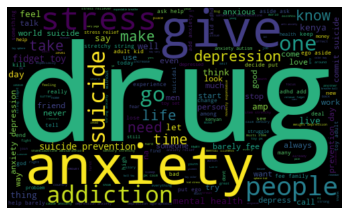

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
temperature = data
allWords= ''.join( [twts for twts in temperature['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=200, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data['clean_text']

1      bunmo multi item stretchy string fidget toy pk...
2      unkonfined basic motivation behind behavior bi...
3      munenekimathi zablonorina bp normal yes check ...
4      deal anxious share experience anxiety yvonne m...
5      know dry spell cause anxiety depression even s...
                             ...                        
680    millicentomanga decide put ego aside ask help ...
681    amerix decide put ego aside ask help barely fe...
682    longterm drug effect include depression anxiet...
683    itsminabo lenana samorai bennytothedj hio ndio...
684    effective method help someone depress step mak...
Name: clean_text, Length: 4172, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4172 entries, 1 to 684
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet            4172 non-null   object
 1   location         4172 non-null   object
 2   friends_count    4172 non-null   object
 3   followers_count  4172 non-null   int64 
 4   statuses_count   4172 non-null   int64 
 5   created_at       4172 non-null   object
 6   retweet_count    4172 non-null   object
 7   label            4172 non-null   object
 8   town             4172 non-null   object
 9   country          2764 non-null   object
 10  clean_text       4172 non-null   object
dtypes: int64(2), object(9)
memory usage: 391.1+ KB


In [ ]:
# Drop unneeded columns
#clean_df=data.drop(columns=['tweet','minute','created_at','date','location'])

In [ ]:
# Drop unneeded columns
clean_df=data.drop(columns=['tweet','location','country'])

In [ ]:
clean_df

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
1,182,83,6950,09/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...
2,983,915,12944,09/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...
3,281,63,290,09/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...
4,220,2052,37982,09/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...
5,857,272,650,09/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...
...,...,...,...,...,...,...,...,...
680,726,117,375,07-09-21 8:04,0,depression,bungoma,millicentomanga decide put ego aside ask help ...
681,726,117,375,07-09-21 8:01,0,depression,bungoma,amerix decide put ego aside ask help barely fe...
682,746,756,560,07-09-21 7:04,11,awareness,isiolo,longterm drug effect include depression anxiet...
683,796,228,3694,07-09-21 6:33,1,general tweet,kiambu,itsminabo lenana samorai bennytothedj hio ndio...


In [ ]:
clean_df.to_csv('final_data_suicide.csv')